**graph** - abstraction used to model a system that contains discrete, interconnected elements.  Elements are represented by **nodes** and interconnections are represented by **edges**.

edges may be **undirected** - that is symmetric, or **directed**.  a **path** is a sequence of nodes with an edge between each consecutive pair.

**applying graph algorithms**
* Reduce - a real world problem to an instance of a graph problem
* Apply - a graph problem to compute the result efficiently
* Interpret the result of the computation in terms of a solution to the original problem.

###Exercise 2.1
1. **simple graph** - an undirected graph with no loops and no more than one edge between any two nodes.  Edges form a set of distinct pairs of edges.  **degree**, that is the number of edges connected to any given node, is at most n - 1.

2. **regular graph** is one where each node has the same number of edges.  a **complete graph** is one where each node is connected by an edge  to every other node.  The degree of every node in this case is n-1, so all nodes have the same degree and are therefore regular graphs.

3. a **path** is a finite sequence of edges connecting two edges.  a **cycle** is some number of vertices that comprise a closed chain.

4. a **forest** is a graph with no cycles.  A **tree** is a **connected** graph with no cycles.  A graph is connected if there is a path from every node to every other node

In [1]:
class Graph(dict):
    
    def __init__(self, vs=[], es=[]):
        """creates a new graph.  
        (vs) is a list of vertices;
        (es) is a list of edges."""
        for v in vs:
            self.add_vertex(v)
        
        for e in es:
            self.add_edge(e)
            
    def add_vertex(self, v):
        """add (v) to the graph"""
        self[v] = {}
    
    def add_edge(self, e):
        """add (e) to the graph by adding an entry 
        in both directions.  If there is already an
        edge connecting these Vertices, the new edge
        replaces it"""
        v, w = e
        self[v][w] = e
        self[w][v] = e

class Vertex(object):
    """object that has a label attribute"""
    def __init__(self, label=''):
        self.label = label
    
    def __repr__(self):
        return 'Vertex(%s)' % repr(self.label)
    
    __str__ = __repr__

class Edge(tuple):
    def __new__(cls, e1, e2):
        return tuple.__new__(cls, (e1, e2))
    
    def __repr__(self):
        return 'Edge(%s, %s)' % (repr(self[0]), repr(self[1]))
    
    __str__ = __repr__

In [2]:
v = Vertex('v')
w = Vertex('w')
e = Edge(v, w)
print e

Edge(Vertex('v'), Vertex('w'))


In [3]:
g = Graph([v, w], [e])
print g

{Vertex('v'): {Vertex('w'): Edge(Vertex('v'), Vertex('w'))}, Vertex('w'): {Vertex('v'): Edge(Vertex('v'), Vertex('w'))}}


###Exercise 2.2

In [4]:
#1
import GraphCode

GraphCode.main(GraphCode)

Vertex('v')
Vertex('w')
Edge(Vertex('v'), Vertex('w'))
{Vertex('v'): {Vertex('w'): Edge(Vertex('v'), Vertex('w'))}, Vertex('w'): {Vertex('v'): Edge(Vertex('v'), Vertex('w'))}}


In [5]:
#2
class Graph(dict):
    
    def __init__(self, vs=[], es=[]):
        """creates a new graph.  
        (vs) is a list of vertices;
        (es) is a list of edges."""
        for v in vs:
            self.add_vertex(v)
        
        for e in es:
            self.add_edge(e)
            
    def add_vertex(self, v):
        """add (v) to the graph"""
        self[v] = {}
    
    def add_edge(self, e):
        """add (e) to the graph by adding an entry 
        in both directions.  If there is already an
        edge connecting these Vertices, the new edge
        replaces it"""
        v, w = e
        if v == w:
            raise ValueError('cannot connect an edge between itself and itself')
        self[v][w] = e
        self[w][v] = e
    
    #3
    def get_edge(self, e):
        v, w = e
        """takes two vertices and returns the edge
        connecting them, if one exists"""
        try:
            return self[v][w]
        except KeyError:
            return None
    #4
    def remove_edge(self, e):
        v, w = e
        del self[v][w]
        del self[w][v]
    
    #5 
    def vertices(self):
        return self.keys()
    
    #6
    def edges(self):
        es = []
        for i in self.keys():
            for j in self[i].keys():
                if j <= i:
                    continue
                es.append(Edge(i, j))
        return es
    
    #7
    def out_vertices(self, v):
        """returns list of vertex vs adjacent vetices"""
        try:
            return self[v].keys()
        except KeyError:
            return []
    
    #8 
    def out_edges(self, v):
        es = []
        vs = self.out_vertices(v)
        for v_adj in vs:
            es.append(self.get_edge((v, v_adj)))
        return es
    
    #9
    def add_all_edges(self):
        """makes complete graph"""
        vs = self.vertices()
        for v1 in vs:
            for v2 in vs:
                if v1 == v2:
                    continue
                else:
                    self.add_edge((v1, v2))
    #Exercise 2.3
    def add_regular_edges(self, k, debug=False):
        from random import choice
        
        vertices = self.vertices()
        n = len(vertices)
        
        if k >= n:
            raise ValueError('degree is greater than order of graph')
        if (k * n) % 2 != 0:
            raise ValueError('product of degree and order of graph must be even for regular graphs')
        
        for v in vertices:
            
            
            if debug: p = 0
            while len(self.out_vertices(v)) < k:
                if debug:
                    p += 1
                    assert p < 50
                
                options = vertices[:]
                r_choice = choice(options)
                
                if debug: j = 0
                while True:
                    
                    if debug:
                        j+=1
                        assert j < 50
                        print 
                        print 'j=', j
                        print 'v:',v, 'v _adj: ', self.out_vertices(v)
                        print 'options: ',options
                        print 'r_choice',r_choice, ', edges = ', self.out_vertices(r_choice)
                    
                    
                    if r_choice == v:
                        options.remove(r_choice)
                        r_choice = choice(options)
                        if debug: print '    r_choice == v'
                    elif r_choice in self.out_vertices(v):
                        options.remove(r_choice)
                        r_choice = choice(options)
                        if debug: print '    r_choice in self.out_vertices(v)'
                    elif len(self.out_edges(r_choice)) >= k:
                        options.remove(r_choice)
                        r_choice = choice(options)
                        if debug: print '    len(self.out_edges(r_choice)) >= k'
                    else:
                        break
                
                
                self.add_edge((v, r_choice))
                if debug:
                    print '    SUCCESS:', v, ', adj:', self.out_vertices(v), ', tot_edges:',  len(self.edges())      
    
class Vertex(object):
    """object that has a label attribute"""
    def __init__(self, label=''):
        self.label = label
    
    def __repr__(self):
        return 'Vertex(%s)' % repr(self.label)
    
    __str__ = __repr__

class Edge(tuple):
    def __new__(cls, e1, e2):
        return tuple.__new__(cls, (e1, e2))
    
    def __repr__(self):
        return 'Edge(%s, %s)' % (repr(self[0]), repr(self[1]))
    
    __str__ = __repr__



In [6]:
v = Vertex('v')
w = Vertex('w')
u = Vertex('u')
e = Edge(v, w)
# print e
g = Graph([v, w], [e])
# print g

#3
# success_ret_e = g.get_edge((v, w)
# fail_ret_e = g.get_edge((v, u))
# print success_ret_e # should print 'Edge(Vertex('v'), Vertex('w'))'
# print fail_ret_e # should print `None`

#4
# g.add_vertex(u)
# e_to_remove = Edge(v, u)
# print g

# g.add_edge(e_to_remove)
# print 
# print g

# g.remove_edge(e_to_remove)
# print
# print g

#5
# print g.vertices()

#6
# print g.edges()

#7
print g.out_vertices(u)

#8
# print g.out_edges(v)

#9
# g_complete = Graph([v, w, u])
# g_complete.add_all_edges()
# print g_complete



[]


In [7]:
#2.3
x = Vertex('x')
t = Vertex('t')
y = Vertex('y')
g_regular = Graph([t, u, v, w, x, y])
for i in range(10):
    vert = Vertex(i)
    g_regular.add_vertex(vert)

for i in range(10):
    g_regular = Graph()
    for j in range(10):
        vert = Vertex(j)
        g_regular.add_vertex(vert)

    print i
    try:
        g_regular.add_regular_edges(2)
    except IndexError, e:
        print e
        break
    
# g_regular.add_regular_edges(1)   
# print len(g_regular.vertices())
# print g_regular

import GraphWorld as GW

layout = GW.CircleLayout(g_regular)
gw = GW.GraphWorld()
gw.show_graph(g_regular, layout)
gw.mainloop()


0
1
list index out of range


I'm not going to do this, but I recognize, obviously, that there is some relationship between loops and order in my regular graph algorithm that is causing failures.  I don't know how I would fix this issue mathematically, but computationally, one thing I can do is try a bunch of times until it works, as in the opposite of the test harness above, which is meant to make my algorithm fail.

Here's what the solution does:

```python
class Graph:
    def add_regular_edges(self, k=2):
        """Make a regular graph with degree k if possible; otherwise raises an exception."""
        vs = self.vertices()
        if k >= len(vs):
            raise ValueError, ("cannot build a regular graph with degree >= number of vertices.")

        if is_odd(k):
            if is_odd(len(vs)):
                raise ValueError, ("cannot build a regular graph with an odd degree and an odd number of vertices.")
            self.add_regular_edges_even(k-1)
            self.add_regular_edges_odd()
        else:
            self.add_regular_edges_even(k)

    def add_regular_edges_even(self, k=2):
        """Make a regular graph with degree k.  k must be even"""
        vs = self.vertices()
        double = vs * 2
        
        for i, v in enumerate(vs):
            for j in range(1,k/2+1):
                w = double[i+j]
                self.add_edge(Edge(v, w))

    def add_regular_edges_odd(self):
        """Adds an extra edge "across" the graph to finish off a regular graph with odd degree.  The number of vertices must be even."""
        vs = self.vertices()
        n = len(vs)
        reduplicated_list = vs * 2
        
        for i in range(n/2):
            v = reduplicated_list[i]
            w = reduplicated_list[i+n/2]
            self.add_edge(Edge(v, w))
```

The key here, and I swear I thought of this, is that you don't use randomness.  This code elegantly enumerates through vertices building k edges.  This code will build the same graph every time though.  I didn't realize that was the idea.



In [8]:
class Graph2(Graph):
    
    def add_regular_edges(self, k=2):
        vertices = self.vertices()
        n = len(vertices)
        
        if is_odd(k):
            if is_odd(n):
                raise ValueError('k and n cannot both be odd')
            self.add_regular_edges_even(k-1)
            self.add_regular_edges_odd()
        else:
            self.add_regular_edges_even(k)
    
    def add_regular_edges_even(self, k=2):
        vs = self.vertices()
        double = vs * 2
        
        for i, v in enumerate(vs):
            for j in xrange(1, k/2 + 1):
                self.add_edge((v, double[i+j]))
    
    def add_regular_edges_odd(self):
        vs = self.vertices()
        n = len(vs)
        double = vs * 2

        for i, v in enumerate(vs):
            self.add_edge((v, double[i + n/2]))

def is_odd(num):
    return num % 2



In [9]:
#2.3
for n, k in [(10, 1),(10,2), (11, 1), (11,8)]:
    
    g_regular2 = Graph2()
    for i in range(n):
        vert = Vertex(i)
        g_regular2.add_vertex(vert)
    
    try:
        g_regular2.add_regular_edges(k) 
    except ValueError, e:
        if str(e) == 'k and n cannot both be odd':
            print 'error passed'

    layout = GW.CircleLayout(g_regular2)
    gw = GW.GraphWorld()
    gw.show_graph(g_regular2, layout)
    gw.mainloop()


error passed


##Exercise 2.4 - Random Graphs
* a G(n,p) graph has n nodes and a probability p that there is an edge between any two nodes.

* note that in the example below, to enurate all possibilities we expect $\binom{11}{2}$ combinations.

In [10]:
import GraphWorld as GW
def show_graph(g, layout='Circle'):
    if layout=="Circle":
        l = GW.CircleLayout(g)
    gw = GW.GraphWorld()
    gw.show_graph(g, l)
    gw.mainloop()

In [11]:
from Graph import *
import random
class RandomGraph(Graph):
    
    def add_random_edges(self, p):
        vs = self.vertices()
        n = len(self.vertices())
        
        combs = 0
        for i, v in enumerate(vs):
            for j in range(i+1, n, 1):
                if random.random() <= p:
                    self.add_edge((v, vs[j]))
        


r = RandomGraph()
for i in range(10):
        vert = Vertex(i)
        r.add_vertex(vert)


r.add_random_edges(.3)

show_graph(r)

In [12]:
##exercise 2.5
class Graph(Graph):
    """Note: need to change this to 'Graph'"""
    
    def is_connected(self, debug=True):
        from collections import deque
        
        vertices = self.vertices()
        for v in vertices:
            v.visited = False
        
        q = deque()
        q.append(vertices[0])
        
        if debug: i = 0
        while len(q) > 0:
            if debug:
                i+=1
                assert i < 100
            v = q.pop()
            v.visited = True
            for adj in self.out_vertices(v):
                if not adj.visited:
                    q.append(adj)
        
        connected_graph = True
        for v in vertices:
            if v.visited == False:
                connected_graph = False
            del v.visited
        
        return connected_graph


g1 = Graph()
for i in xrange(10):
    vert = Vertex(i)
    g1.add_vertex(vert)
g1.add_regular_edges(1)

print 'false: ', g1.is_connected()
# show_graph(g1)

g2 = Graph()
for i in xrange(10):
    vert = Vertex(i)
    g2.add_vertex(vert)
g1.add_all_edges()

print 'True: ', g1.is_connected()

false:  False
True:  True


In [85]:
##exercise 2.6
from RandomGraph import RandomGraph
import matplotlib.pyplot as plt
import numpy as np

def MakeAndTestRandomGraph(n, p, num_trials=10, results=[]):
    vs = []
    count = 0
    for i in range(num_trials):
        for i in range(n):
            vs.append(Vertex(i))
        r = RandomGraph(vs)
        r.add_random_edges(p)
        if r.is_connected():
            count += 1
    results.append((n, p, count))
    return results



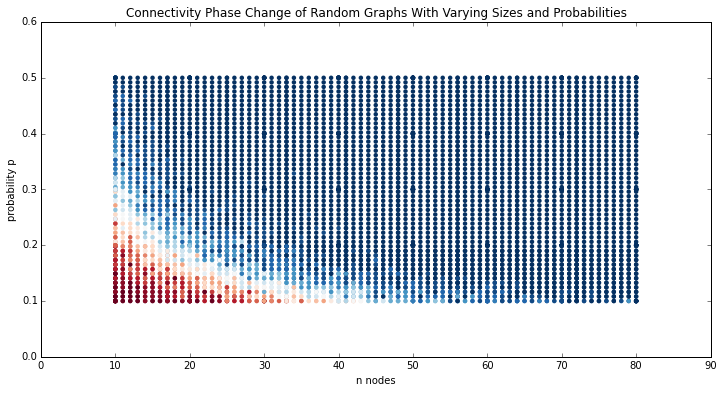

In [97]:
%matplotlib inline
ps = np.linspace(0.1, 0.5, 50)
ns = np.linspace(10, 80, 80, dtype=np.int)

# ps = np.linspace(0.1, 0.5, 5)
# ns = np.linspace(10, 80, 8, dtype=np.int)
num_trials=20


for p in ps:
    for n in ns:
        results = MakeAndTestRandomGraph(n, p, num_trials)

n_res, p_res, count_res = zip(*results)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(n_res, p_res, c=count_res, edgecolor='none', cmap=plt.cm.RdBu)
ax.set_xlabel('n nodes')
ax.set_ylabel('probability p')
ax.set_title('Connectivity Phase Change of Random Graphs With Varying ' +
             'Sizes and Probabilities')
plt.show()

Smaller Graphs require a higher Probability in order to achieve connectedness. 

##Iterators
an **iterator** is n object that provides a method named next that returns the next element in a sequence.  Can be faster in a for-loop because doesn't build an entire list.  

Note: 
*  only safe if you do not add or remove keys inside the dict
*  do not support index operations
* a user-defined object can be used as an iterator if it provides the following:
    * `next()` function
    * `__iter__`

In [99]:
d = dict(a=1, b=2)
iter = d.iterkeys()
print iter.next()
print iter.next()
print iter.next()

a
b


StopIteration: 

In [100]:
class AllTrue(object):
    def next(self):
        return True
    
    def __iter__(self):
        return self

print zip('abc', AllTrue())

[('a', True), ('b', True), ('c', True)]


##Generators

a function that contains a **yield statement**--similar to a return except that the state of the running function is stored and can be resumed. 

In [106]:
def generate_letters():
    for letter in 'abc':
        yield letter
iter = generate_letters()
print iter
print iter.next()
print iter.next()
print 
for letter in generate_letters():
    print letter

<generator object generate_letters at 0x11dd13f00>
a
b

a
b
c


In [111]:
#infinite cycle
import string
def alphabet_cycle():
    while True:
        for c in string.lowercase:
            yield c
iter = alphabet_cycle()
print iter.next()

a


##Exercise 2.7

In [ ]:
def alphanumeric_cycle2():
    num = 0
    while True:
        for c in string.lowercase:
            yield c + num
        num += 1

iter = alphanumeric_cycle2()
for i in range(32):
    